# 1

In [1]:
import numpy as np
from statsmodels.stats.proportion import proportion_confint
from tqdm.notebook import tqdm as tqdm_notebook
from scipy import stats


np.random.seed(42)
negatives_ttest = 0
negatives_mw = 0
alpha = 0.05
conf_int_alpha = 0.05

mu_x = 0
mu_y = 0.5
delta = 0.01
sigmas = np.arange(1, 16)

n = 100 # размер выборки
n_tests = 1000 # количество повторений теста

p_values_ttest = []
p_values_mw = []
fnr_ttest = []
fnr_mw = []

# Проверяем гипотезу о равенстве средних при неверной H0 (критерий Стьюдента)
for sigma in tqdm_notebook(sigmas):
    for i in tqdm_notebook(range(n_tests)):  
        # генерация выборок
        U_x = stats.norm(loc=mu_x, scale=1).rvs(size=n)
        V_x = stats.norm(loc=mu_x, scale=sigma).rvs(size=n)
        W_x = stats.uniform().rvs(size=n)
        X = np.where(W_x > delta, U_x, V_x)

        U_y = stats.norm(loc=mu_y, scale=1).rvs(size=n)
        V_y = stats.norm(loc=mu_y, scale=sigma).rvs(size=n)
        W_y = stats.uniform().rvs(size=n)
        Y = np.where(W_y > delta, U_y, V_y)
        
        # рассчитываем pvalue для обоих критериев
        p_values_ttest.append(stats.ttest_ind(X, Y)[1])
        p_values_mw.append(stats.mannwhitneyu(X, Y)[1])
        # накапливаем negatives (подсчитываем количество ошибок)
        negatives_ttest += p_values_ttest[-1] > alpha  
        negatives_mw += p_values_mw[-1] > alpha  
    positives_ttest = n_tests - negatives_ttest
    positives_mw = n_tests - negatives_mw
    # определяем FNR (ошибку 2-го рода)
    fnr_ttest.append(negatives_ttest / (positives_ttest + negatives_ttest))
    fnr_mw.append(negatives_mw / (positives_mw + negatives_mw))
    negatives_ttest = 0
    negatives_mw = 0

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Text(0, 0.5, 'FNR')

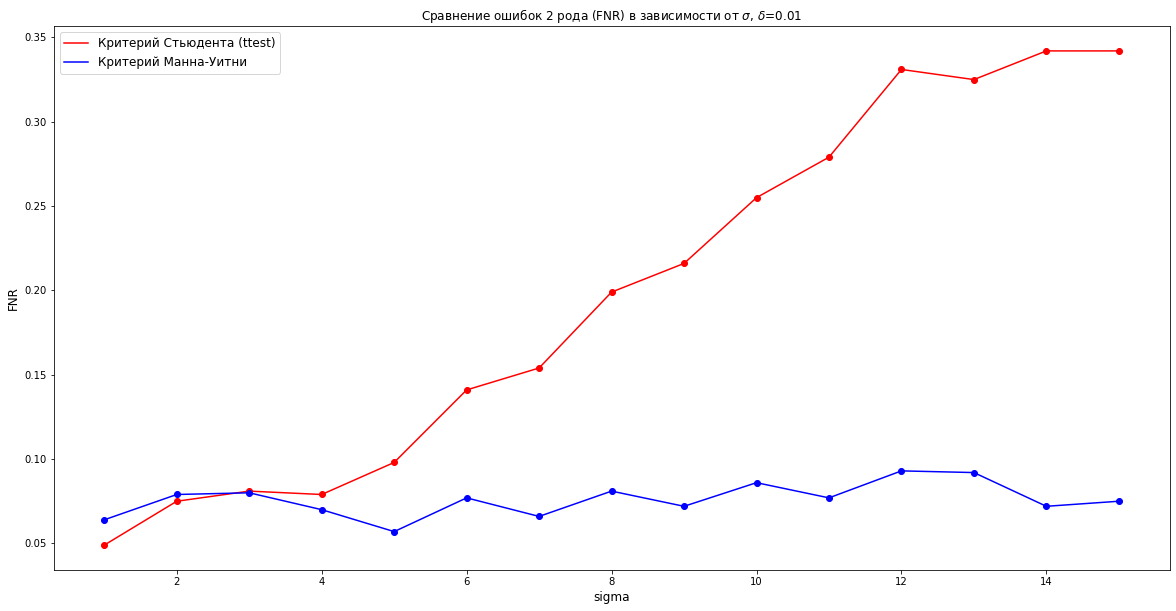

In [2]:
from matplotlib import pyplot

pyplot.figure(figsize=(20, 10))
pyplot.plot(sigmas, fnr_ttest, 'r', label='Критерий Стьюдента (ttest)')
pyplot.plot(sigmas, fnr_ttest, 'ro')
pyplot.plot(sigmas, fnr_mw, 'b', label='Критерий Манна-Уитни')
pyplot.plot(sigmas, fnr_mw, 'bo')
pyplot.legend(fontsize=12)
pyplot.title(f'Сравнение ошибок 2 рода (FNR) в зависимости от $\sigma$, $\delta$={delta}', fontsize=12)
pyplot.xlabel('sigma', fontsize=12)
pyplot.ylabel('FNR', fontsize=12)

# 2

In [3]:
import numpy as np
from statsmodels.stats.proportion import proportion_confint
from tqdm.notebook import tqdm as tqdm_notebook
from scipy import stats


np.random.seed(42)
negatives_ttest = 0
negatives_mw = 0
alpha = 0.05
conf_int_alpha = 0.05

mu_x = 0
mu_y = 0.5
deltas = np.linspace(0, 0.08, num=15)
sigma = 3

n = 100 # размер выборки
n_tests = 1000 # количество повторений теста

p_values_ttest = []
p_values_mw = []
fnr_ttest = []
fnr_mw = []

# Проверяем гипотезу о равенстве средних при неверной H0 (критерий Стьюдента)
for delta in tqdm_notebook(deltas):
    for i in tqdm_notebook(range(n_tests)):  
        # генерация выборок
        U_x = stats.norm(loc=mu_x, scale=1).rvs(size=n)
        V_x = stats.norm(loc=mu_x, scale=sigma).rvs(size=n)
        W_x = stats.uniform().rvs(size=n)
        X = np.where(W_x > delta, U_x, V_x)

        U_y = stats.norm(loc=mu_y, scale=1).rvs(size=n)
        V_y = stats.norm(loc=mu_y, scale=sigma).rvs(size=n)
        W_y = stats.uniform().rvs(size=n)
        Y = np.where(W_y > delta, U_y, V_y)
        
        # рассчитываем pvalue для обоих критериев
        p_values_ttest.append(stats.ttest_ind(X, Y)[1])
        p_values_mw.append(stats.mannwhitneyu(X, Y)[1])
        # накапливаем negatives (подсчитываем количество ошибок)
        negatives_ttest += p_values_ttest[-1] > alpha  
        negatives_mw += p_values_mw[-1] > alpha  
    positives_ttest = n_tests - negatives_ttest
    positives_mw = n_tests - negatives_mw
    # определяем FNR (ошибку 2-го рода)
    fnr_ttest.append(negatives_ttest / (positives_ttest + negatives_ttest))
    fnr_mw.append(negatives_mw / (positives_mw + negatives_mw))
    negatives_ttest = 0
    negatives_mw = 0

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Text(0, 0.5, 'FNR')

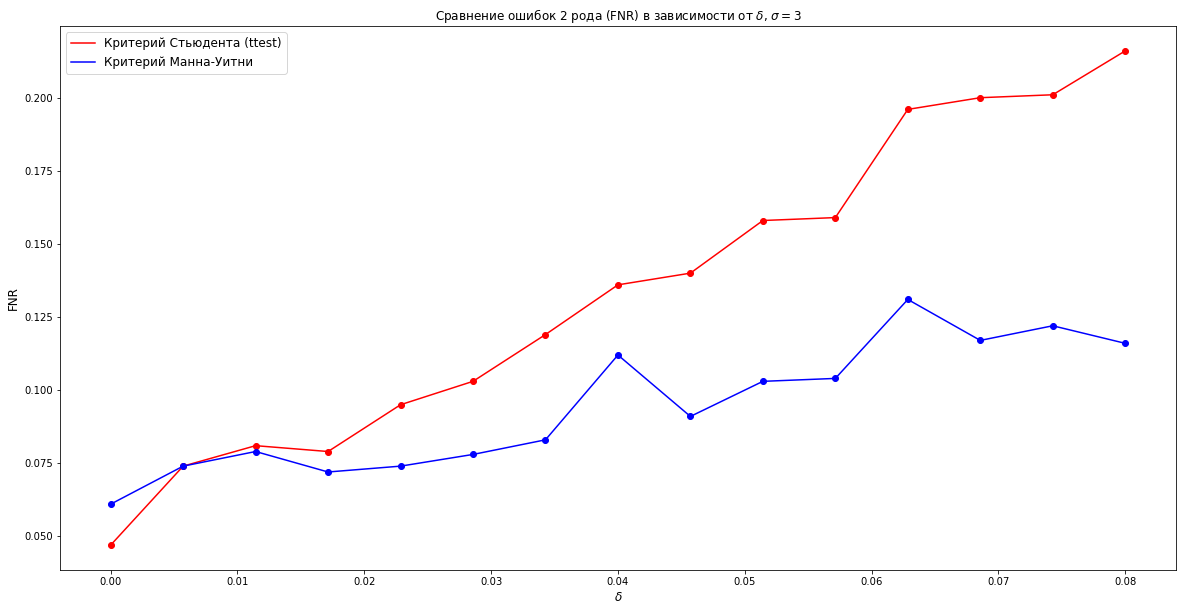

In [4]:
from matplotlib import pyplot

pyplot.figure(figsize=(20, 10))
pyplot.plot(deltas, fnr_ttest, 'r', label='Критерий Стьюдента (ttest)')
pyplot.plot(deltas, fnr_ttest, 'ro')
pyplot.plot(deltas, fnr_mw, 'b', label='Критерий Манна-Уитни')
pyplot.plot(deltas, fnr_mw, 'bo')
pyplot.legend(fontsize=12)
pyplot.title(f'Сравнение ошибок 2 рода (FNR) в зависимости от $\delta$, $\sigma={sigma}$', fontsize=12)
pyplot.xlabel(f'$\delta$', fontsize=12)
pyplot.ylabel('FNR', fontsize=12)